# 3.1. Statistics in Python
Adapted from: https://scipy-lectures.org/packages/statistics/index.html

Author: Gaël Varoquaux

## Disclaimer
This notebook is a reproduction of the above SciPy tutorial by Gaël Varoquaux. Here, I will be following along step by step, making my own adjustments and adding my own markdown.

## 3.1.1. Data representation and interaction

### 3.1.1.1. Data as a table
The file "brain_size.csv" is required to run the code in this notebook and can be downloaded from the link in the header of this notebook.

### 3.1.1.2. The pandas DataFrame

#### A) Creating dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import os
import urllib
from pandas.plotting import scatter_matrix
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

This imports the Python libraries we will be using for this code.

- **pandas:** data analysis and manipulation
- **numpy:** multi-dimensional arrays and matrices
- **matplotlib.pyplot:** data plotting and visualization

In [2]:
# Read csv into DataFrame
data = pd.read_csv('../brain_size.csv', sep=';', na_values='.')

**data = pd.read_csv** reads the specified .csv file that we downloaded earlier into pandas

In [3]:
# Print DataFrame as table
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


**data** prints the DataFrame in the form of a table

#### B) Manipulating data

In [4]:
# Print (rows, columns)
data.shape

(40, 8)

**data.shape** prints (number of rows, number of columns) in the DataFrame

In [5]:
# Print list of columns
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

**data.columns** prints a list of columns in the DataFrame that can be called by their 'name'

In [6]:
# Change display index from 0 to 1
data.index = np.arange(1, len(data) + 1)

**data.index** changes the display index of the DataFrame to start at 1 instead of 0, making it easier to visually cross-reference the csv

In [7]:
# Print DataFrame values from column 'X'
print(data['Weight'])

1     118.0
2       NaN
3     143.0
4     172.0
5     147.0
6     146.0
7     138.0
8     175.0
9     134.0
10    172.0
11    118.0
12    151.0
13    155.0
14    155.0
15    146.0
16    135.0
17    127.0
18    178.0
19    136.0
20    180.0
21      NaN
22    186.0
23    122.0
24    132.0
25    114.0
26    171.0
27    140.0
28    187.0
29    106.0
30    159.0
31    127.0
32    191.0
33    192.0
34    181.0
35    143.0
36    153.0
37    144.0
38    139.0
39    148.0
40    179.0
Name: Weight, dtype: float64


**print(data['Column'])** prints a list of all values from the DataFrame in a given 'Column'

In [8]:
# Calculate and print mean of column 'X'
print(data.groupby('Gender')['VIQ'].mean())

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64


**data.groupby** sorts a DataFrame based on categorical variables (*e.g.* male and female subject groups)

In [9]:
# Calculate and print mean of each column
print(data.groupby('Gender').mean())

        Unnamed: 0   FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                                     
Female       19.65  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male         21.35  115.0  115.25  111.60  166.444444  71.431579   954855.4


The lines...

    print(data.groupby('Gender')['VIQ'].mean())
    
and...

    groupby_gender.mean()

...both calculate and print the mean, with the former specifying the parameter 'VIQ' and the latter printing the mean for each 

#### C) Plotting data

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

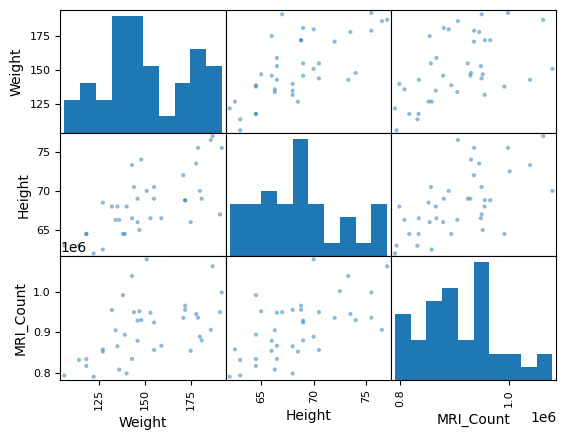

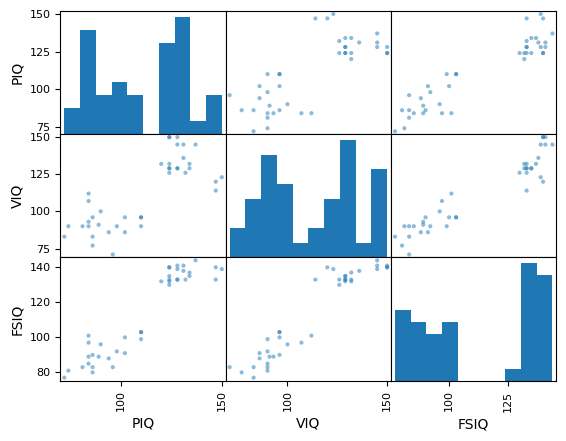

In [10]:
# Create scatter plots
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

**scatter_matrix(data[['X', 'Y', 'Z']])** generates and displays a scatter plot for columns 'X' 'Y' and 'Z'

## 3.1.2. Hypothesis testing: comparing two groups

### 3.1.2.1. Student’s t-test: the simplest statistical test

In [11]:
# Perform 1-sample t-test
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

**scipy.stats.ttest_1samp()** performs a 1-sample t-test whether the mean of a set of data (*e.g.* 'VIQ') is equal to a defined value (*e.g.* '0') and prints the T statistic, p-value, and degrees of freedom

### 2-sample t-test: testing for difference across populations

In [12]:
# Define data and perform 2-sample t-test
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

**stats.ttest_ind()** performs a 2-sample t-test comparing the means of two populations and reports the statistical significance of the comparison

### 3.1.2.2. Paired tests: repeated measurements on the same individuals

In [13]:
# Perform 2-sample, unpaired t-test
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

When comparing related observations from the same subject a paired t-test is appropriate, since one observation may be dependent on another.

In [14]:
# Perform 2-sample, paired t-test
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [15]:
# Perform 1-sample t-test
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

Interestingly, the result of a 2-sample, paired t-test will be equivalent to the result of a 1-sample test of difference

In [16]:
# Perform Wilcoxon signed-rank test
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

The Wilcoxon signed-rank test relaxes the assumption of Gaussian errors implicit in t-tests

## 3.1.3. Linear models, multiple factors, and analysis of variance

### 3.1.3.1. “Formulas” to specify statistical models in Python

#### A) Linear regression

A linear regression tests the hypothesis that *X* is a linear function of *Y* by fitting a line to the data in question with the formula:

    y=m*x+b

In [17]:
# Create an array of 20 evenly spaced values between -5 and 5 and set random number generator seed '1'
x = np.linspace(-5, 5, 20)
np.random.seed(1)

# Normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

# Specify OLS model and fit to data
model = ols("y ~ x", data).fit()

# Print model summary
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        15:04:38   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

**R-squared** represents the proportion of variation in *X* that is predictable based on *Y*. An R-squared value of 1 would indicate a completely linear relationship between *X* and *Y*, whereas an R-squared value of 0 would indicate no correlative relationship between those variables. In this example, R-squared = 0.804, indicating that ~80% of the variability of observation *X* can be explained by the corresponding value of *Y* for that observation.

#### B) Categorical variables: comparing groups or multiple categories

In [18]:
# Read csv into DataFrame
data = pd.read_csv('../brain_size.csv', sep=';', na_values='.')

# Specify OLS model and fit to data
model = ols("VIQ ~ Gender", data).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.445
Time:                        15:04:39   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

Here, we fit a linear regression model to the data on brain size from earlier. We tested the relationship between the continuous variable 'VIQ' (71 - 150) and the discrete category 'Gender' (*a* or *b*). Our model yielded an R-squared value of 0.015, indicating an extremely weak relationship between the variables tested (*i.e.* only 'Gender' predicts only 1.5% of variability in 'VIQ').

statsmodels (the library we used to run our linear regression model analysis) automatically detects non-numerical data (*e.g.* 'Male' and 'Female') as categorical. However, we can also do this manually by placing a 'C' before the categorical data column:

    model = ols('VIQ ~ C(Gender)', data).fit()

### 3.1.3.2. Multiple Regression: including multiple factors

Suppose that we would like to consider the relationship between three variables. We could fit a model to such a relationship using a multiple regression analysis. In this case, instead of a 2-dimensional, linear model we would need to fit one that is 3-dimensional to accomodate the variables *'X'*, *'Y'* and *'Z'*. This model would follow the formula:

    z=A*x+B*y+i+e

In [19]:
# Read csv into DataFrame
data = pd.read_csv('../iris.csv')

# Specify OLS model and fit to data
model = ols('sepal_width ~ name + petal_length', data).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        15:04:40   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

Here, we fit a multiple regression model to data on petal and sepal size in three species of iris, *T. setosa*, *T. versicolor* and *T. virginica*. We tested the relationship between two continuous variables, 'sepal_width' and 'petal_length,' and the discrete category 'name' (*i.e.* species). Our model yielded an R-squared value of 0.478, indicating that 'species' predicts ~47.8% of variability in 'sepal_width' and 'petal_length.'

### 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)

An analysis of variance, or ANOVA, is a statistical test that compares the means of two or more groups and determines whether they differ from one another in a statistically significant manner. The F-statistic, or F-test, represents the ratio of variance between group means to the variance within the groups.

In [20]:
# Read csv into DataFrame
data = pd.read_csv('../iris.csv')

# Specify OLS model and fit to data
model = ols('sepal_width ~ name + petal_length', data).fit()

# Print ANOVA f-test
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


Here, we compared the variance in mean 'sepal_width' and 'petal_length' between each species to the variance in those observations within each species. A higher F-statistic (greater than 1) suggests that the between-group variance is greater than the within-group variance. Our ANOVA yielded an F-value of ~3.245, potentially indicating a significant difference between group means. However, our p-value of ~0.07 is higher than the typical cutoff of 0.05. Additionally, the probability of a type 1 error increases with when we compare multiple groups. Therefore, we should perform a post-hoc test (*e.g.* Bonferroni correction) to mitigate the possibility that our F-value significance is the result of a false positive.

In [21]:
# Read csv into DataFrame
data = pd.read_csv('../iris.csv')

# Specify OLS model and fit to data
model = ols('sepal_width ~ name + petal_length', data).fit()

# Print ANOVA f-test
print(model.f_test([0, 1, -1, 0]))

# Perform Bonferroni-corrected post-hoc test for 'name'
mc = MultiComparison(data['sepal_width'], data['name'])
bonf_result = mc.allpairtest(sm.stats.ttest_ind, method='bonf')

# Print Bonferroni test results
print(bonf_result[0])

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
  group1     group2     stat   pval  pval_corr reject
-----------------------------------------------------
    setosa versicolor  9.2828    0.0       0.0   True
    setosa  virginica  6.2894    0.0       0.0   True
versicolor  virginica -3.2058 0.0018    0.0055   True
-----------------------------------------------------


The column 'reject' summarizes whether or not the F-test and p-value for each comparison in our ANOVA is sufficient to reject the null hypothesis (*i.e.*  variation in the observed data is merely due to chance and that no effect or difference exists in the population being studied). We can reject the null hypothesis for each of our pairwise comparisons between species, meaning that the observed variation in 'sepal_width' and 'petal_length' is unlikely to be a result of random chance.

### 3.1.4. More visualization: seaborn for statistical exploration

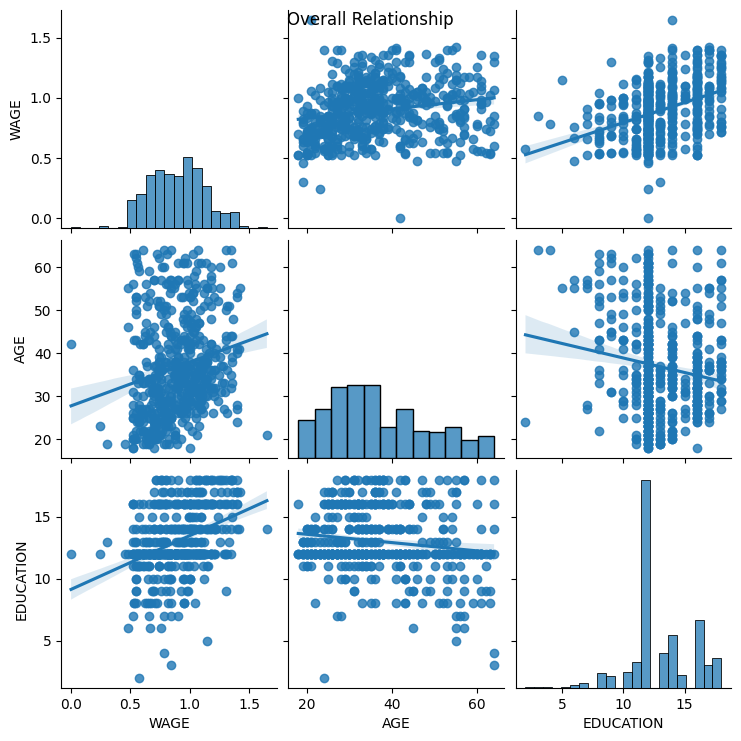

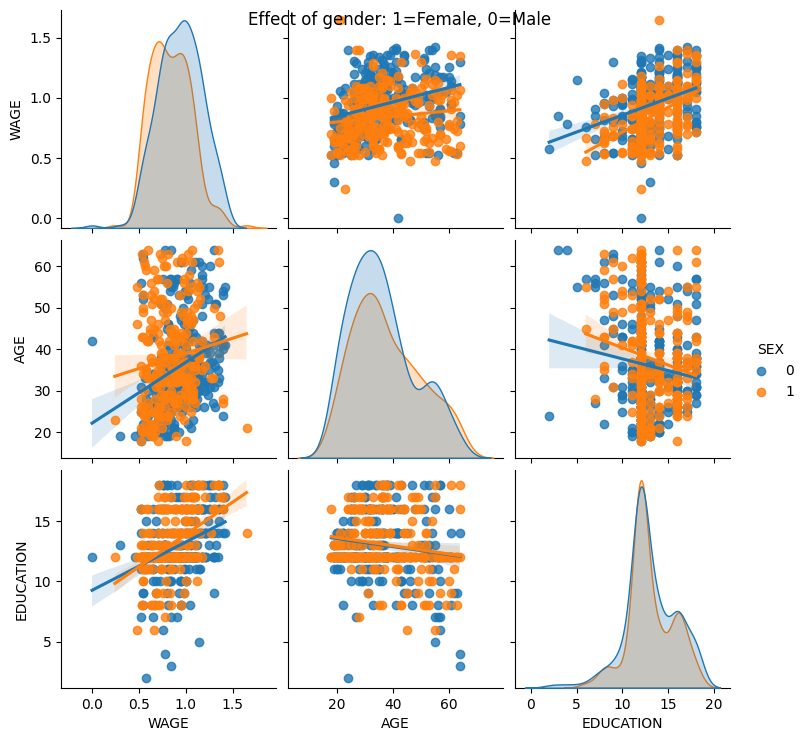

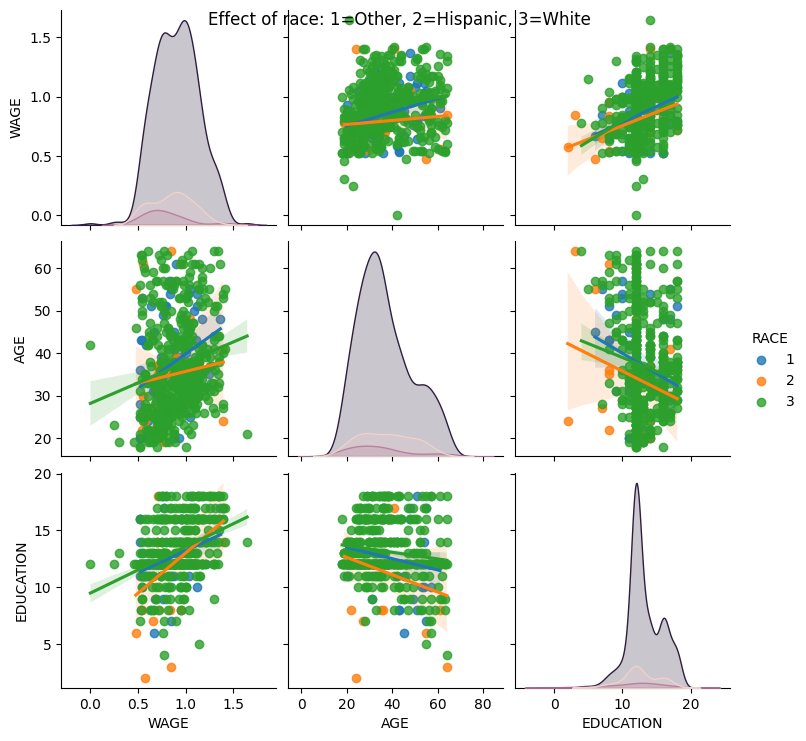

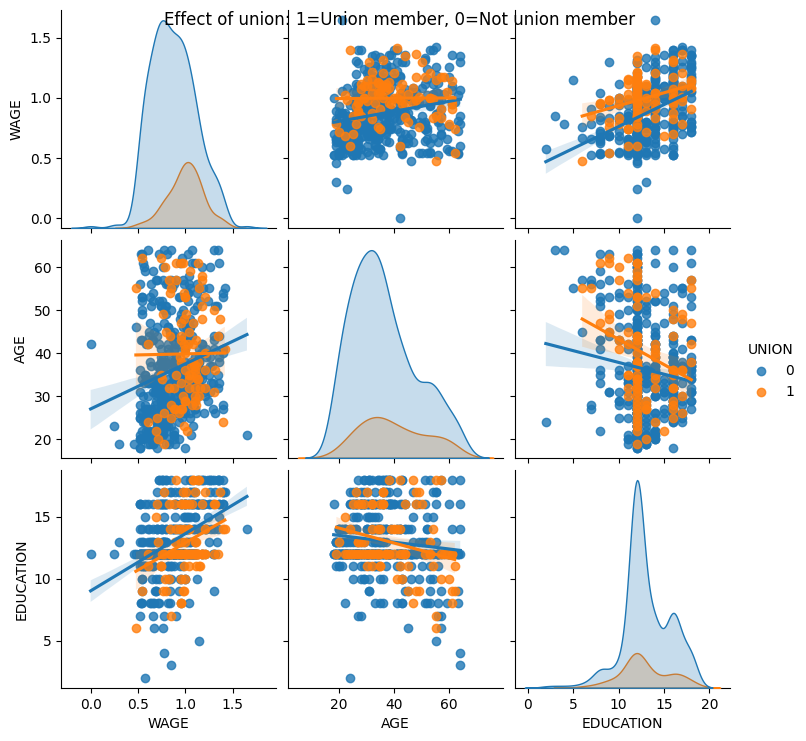

In [22]:
# Define names and short_names BEFORE assigning column names
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

# Read the data
data = pd.read_csv('../wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, engine='python')

# Assign short column names
data.columns = short_names

# Log-transform the wages (skip invalid/zero values to avoid -inf)
data['WAGE'] = np.where(data['WAGE'] > 0, np.log10(data['WAGE']), np.nan)

# Create the plots
sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')
plt.suptitle('Overall Relationship')

sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

plt.show()


**seaborn.pairplot()** is a function of Seaborn, a Python data visualization library based on matplotlib. It combines statistical model fitting functionality with plotting features utilizing pandas DataFrames. Here, we used seaborn to create various scatter plots, histograms, and ridge plots to visualize wage and demographic data from a .txt file.

Find the original file here:
https://lib.stat.cmu.edu/datasets/CPS_85_Wages

### 3.1.4.2. lmplot: plotting a univariate regression

Recall the linear regression analysis described in section 3.1.3.1 A). We can use **seaborn.lmplot()** to visualize such a regression model and fit a line to our data like so:

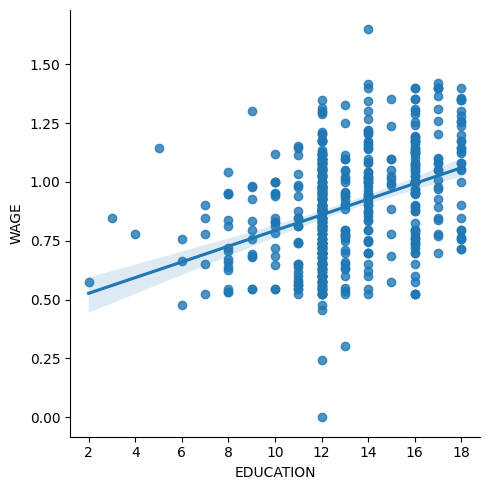

In [23]:
# Define names and short_names BEFORE assigning column names
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

# Read the data
data = pd.read_csv('../wages.txt', skiprows=27, skipfooter=6, sep=None, header=None, engine='python')

# Assign short column names
data.columns = short_names

# Log-transform the wages (skip invalid/zero values to avoid -inf)
data['WAGE'] = np.where(data['WAGE'] > 0, np.log10(data['WAGE']), np.nan)

# Generate plot and fit regression model
sns.lmplot(y='WAGE', x='EDUCATION', data=data)
plt.show()

### 3.1.5. Testing for interactions

Building off of the concept of linear regression analysis to describe the effect of *'X'* on *'Y'*, we can also test for **interactions**, or how a third variable *'Z'* affects the relationship between *'X'* and *'Y'*.

**Note:** Multiple regression and interaction tests are related concepts, but not the same. Multiple regression analyzes the relationship between a dependent variable and multiple independent variables, while interaction tests specifically examine whether the effect of one independent variable on the dependent variable depends on the value of another independent variable. 

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        15:04:56   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

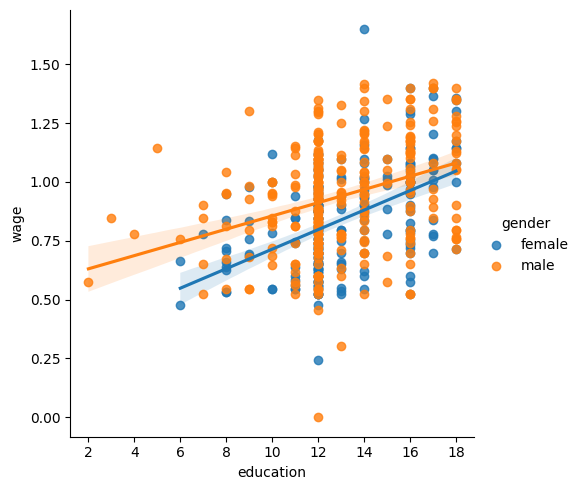

In [24]:
# Read txt into DataFrame
data = pd.read_csv('../wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5], engine='python')

# Convert genders to strings (gender is a categorical variable)
data['gender'] = np.choose(data.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with multiplicative factors
data['wage'] = np.log10(data['wage'])

# Fit OLS interaction model to data and report summary
result = smf.ols(formula='wage ~ education + gender + education * gender', data=data).fit()
print(result.summary())

# Generate plot with Seaborn
sns.lmplot(y='wage', x='education', hue='gender', data=data)

Here, we tested whether the effect of education (X) on wages (Y) differ between genders (Z).

Based on the p-value of the interaction of gender and education, we cannot reject the null hypothesis (p-value > 0.05).